# Building `econ_news_kr` corpus


## Prepare an environment

In [1]:
# %config InlineBackend.figure_format='retina's
from ekorpkit import eKonf

eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("environment variables:")
eKonf.print(eKonf.env().dict())

version: 0.1.38+26.g3d56094
is notebook? True
is colab? False
environment variables:
{'CUDA_DEVICE_ORDER': None,
 'CUDA_VISIBLE_DEVICES': None,
 'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_LOG_LEVEL': 'WARNING',
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'KMP_DUPLICATE_LIB_OK': 'TRUE',
 'NUM_WORKERS': 230}


## Build a corpus

In [2]:
data_dir = "../data/econ_news_kr"

```bash
ekorpkit \
    project=esgml \
    dir.workspace=/workspace \
    verbose=true \
    print_config=false \
    num_workers=200 \
    cmd=fetch_builtin_corpus \
    +corpus/builtin=econ_news_kr \
    corpus.builtin.io.force.summarize=true \
    corpus.builtin.io.force.preprocess=true \
    corpus.builtin.io.force.build=true \
    corpus.builtin.io.force.download=false
```    

## Load a corpus


In [3]:
corpus_cfg = eKonf.compose("corpus", overrides=["project=esgml"])
corpus_cfg.name = "econ_news_kr"
corpus_cfg.verbose = False
econ_news_kr = eKonf.instantiate(corpus_cfg)
print(econ_news_kr)

INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env
INFO:ekorpkit.base:setting environment variable CACHED_PATH_CACHE_ROOT to /workspace/.cache/cached_path
INFO:ekorpkit.base:setting environment variable KMP_DUPLICATE_LIB_OK to TRUE


Corpus : econ_news_kr


In [4]:
econ_news_kr.metadata

,id,date,code,category,filename,split
0,0,2020-11-01 06:01:24,02100101,None,02100101.20201101060124001.txt,train
1,1,2020-11-01 08:27:23,02100101,None,02100101.20201101082723001.txt,train
2,2,2020-11-01 09:01:50,02100101,None,02100101.20201101090150001.txt,train
3,3,2020-11-01 09:05:15,02100101,None,02100101.20201101090515001.txt,train
4,4,2020-11-01 09:26:41,02100101,None,02100101.20201101092641001.txt,train
...,...,...,...,...,...,...
1090653,1090653,2022-02-28 18:49:28,02100851,None,02100851.20220228184928001.txt,train
1090654,1090654,2022-02-28 19:04:38,02100851,None,02100851.20220228190438002.txt,train
1090655,1090655,2022-02-28 19:37:36,02100851,None,02100851.20220228193736001.txt,train
1090656,1090656,2022-02-28 20:51:36,02100851,None,02100851.20220228205136001.txt,train


In [5]:
econ_news_kr.data

,id,text,split,ext
0,0,'사보'는 기업들의 소통수단이다. 계열사 정보 공유 측면도 있다. 또한 대외적으로 ...,train,txt
1,1,2030을 주축으로 한 이른바 '동학개미운동'이 계속되는 등 주식 투자 열풍이 사그...,train,txt
2,2,현대모비스가 사회적 거리두기 캠페인에 발맞춰 지난 2월부터 임시적으로 시행해오던 재...,train,txt
3,3,우리나라 수출이 한 달 만에 다시 감소세로 전환했다.\n산업통상자원부는 10월 수출...,train,txt
4,4,국내 외식업계에 '푸드테크(Food+Technology)' 바람이 불고 있다. 매년...,train,txt
...,...,...,...,...
1090653,1090653,서울 시내 대형마트 가공식품 판매대[사진=연합]\n\n\n 스팸과 리챔 등 캔햄 가...,train,txt
1090654,1090654,[로고=에치에프알]\n\n정보통신 기업 에치에프알(HFR)은 28일 일본 정보통신기...,train,txt
1090655,1090655,[사진=연합뉴스]\n\n\n 한국거래소는 상장적격성 실질심사 대상으로 결정된 오스템...,train,txt
1090656,1090656,[사진=유대길 기자 dbeorlf123@ajunews.com]\n\n고승범 금융위원...,train,txt


In [14]:
cfg = eKonf.compose("pipeline", overrides=["project=esgml"])
cfg.data.corpus = corpus_cfg
cfg._pipeline_ = ["chunk", "explode_splits", "reset_index", "save_dataframe"]
cfg.chunk.len_func = "len_words"
cfg.chunk.chunk_size = 200
cfg.explode_splits.id_key = "id"
cfg.explode_splits.split_key = "chunk_id"
cfg.explode_splits.separator = "\n\n"
cfg.reset_index.drop_index = True
cfg.save_dataframe.output_dir = data_dir
cfg.save_dataframe.output_file = "econ_news_kr_chunks.parquet"
chunk_df = eKonf.instantiate(cfg)
chunk_df

INFO:ekorpkit.base:instantiating ekorpkit.pipelines.pipe.pipeline...
INFO:ekorpkit.base:instantiating ekorpkit.pipelines.data.Data...
INFO:ekorpkit.datasets.base:Loaded info file: /workspace/data/datasets/corpus/ekorpkit/econ_news_kr/info-econ_news_kr.yaml
INFO:ekorpkit.io.file:Processing [1] files from ['econ_news_kr-train.parquet']
INFO:ekorpkit.io.file:Loading 1 dataframes from ['/workspace/data/datasets/corpus/ekorpkit/econ_news_kr/econ_news_kr-train.parquet']
INFO:ekorpkit.io.file:Loading data from /workspace/data/datasets/corpus/ekorpkit/econ_news_kr/econ_news_kr-train.parquet
INFO:ekorpkit.info.column:index: index, index of data: None, columns: ['id', 'text', 'split', 'ext'], id: ['id']
INFO:ekorpkit.info.column:Adding id [split] to ['id']
INFO:ekorpkit.info.column:Added id [split], now ['id', 'split']
INFO:ekorpkit.info.column:Added a column [split] with value [train]
INFO:ekorpkit.io.file:Processing [1] files from ['meta-econ_news_kr-train.parquet']
INFO:ekorpkit.io.file:Loadi

Chunking column: text:   0%|          | 0/1091 [00:00<?, ?it/s]

INFO:ekorpkit.pipelines.pipe: >> elapsed time to segment: 0:00:45.203924
INFO:ekorpkit.base:Applying pipe: functools.partial(<function explode_splits at 0x7f0faefeb040>)
INFO:ekorpkit.pipelines.pipe:Exploding column: {'_func_': {'_partial_': True, '_target_': 'ekorpkit.pipelines.pipe.explode_splits'}, 'apply_to': 'text', 'id_key': 'id', 'split_key': 'chunk_id', 'separator': '\n\n', 'verbose': True}
INFO:ekorpkit.pipelines.pipe:1090658 documents exploded into 1816019 documents
INFO:ekorpkit.base:Applying pipe: functools.partial(<function reset_index at 0x7f0faefeb160>)
INFO:ekorpkit.pipelines.pipe:Resetting index: {'_func_': {'_partial_': True, '_target_': 'ekorpkit.pipelines.pipe.reset_index'}, 'index_column_name': 'id', 'drop_index': True, 'verbose': True}
INFO:ekorpkit.base:Applying pipe: functools.partial(<function save_dataframe at 0x7f0faefebe50>)
INFO:ekorpkit.io.file:Saving dataframe to ../data/econ_news_kr/econ_news_kr_chunks.parquet


   id                                               text  split  ext  chunk_id
0   0  '사보'는 기업들의 소통수단이다. 계열사 정보 공유 측면도 있다. 또한 대외적으로 ...  train  txt         0
1   0  안병덕 코오롱그룹 부회장은 "사보를 통해 코오롱인은 하나가 되었고, 자긍심을 키워왔...  train  txt         1
2   0  코오롱 관계자는 "600호에 이르기까지 인쇄 사보를 중심으로 온라인, 모바일 환경 ...  train  txt         2
3   1  2030을 주축으로 한 이른바 '동학개미운동'이 계속되는 등 주식 투자 열풍이 사그...  train  txt         0
4   1  한국투자증권은 지난 8월 소액으로 투자 가능한 해외주식 모바일 앱 '미니스탁'을 선...  train  txt         1


INFO:ekorpkit.io.file: >> elapsed time to save data: 0:03:28.173666


,id,text,split,ext,chunk_id
0,0,'사보'는 기업들의 소통수단이다. 계열사 정보 공유 측면도 있다. 또한 대외적으로 ...,train,txt,0
1,0,"안병덕 코오롱그룹 부회장은 ""사보를 통해 코오롱인은 하나가 되었고, 자긍심을 키워왔...",train,txt,1
2,0,"코오롱 관계자는 ""600호에 이르기까지 인쇄 사보를 중심으로 온라인, 모바일 환경 ...",train,txt,2
3,1,2030을 주축으로 한 이른바 '동학개미운동'이 계속되는 등 주식 투자 열풍이 사그...,train,txt,0
4,1,한국투자증권은 지난 8월 소액으로 투자 가능한 해외주식 모바일 앱 '미니스탁'을 선...,train,txt,1
...,...,...,...,...,...
1816014,1090655,[사진=연합뉴스]\n 한국거래소는 상장적격성 실질심사 대상으로 결정된 오스템임플란트...,train,txt,0
1816015,1090656,[사진=유대길 기자 dbeorlf123@ajunews.com]\n고승범 금융위원장이...,train,txt,0
1816016,1090657,[사진=아주경제 DB]\n◆ [우크라 침공] 러·우크라 회담 개시… 회담 성과는 미...,train,txt,0
1816017,1090657,서울시 등 각 지방자치단체에 따르면 이날 0시부터 오후 9시까지 전국 17개 시도에...,train,txt,1


In [6]:
chunk_df = eKonf.load_data("econ_news_kr_chunks.parquet", data_dir)

347 768


In [16]:
chunk_df.text[0]

'\'사보\'는 기업들의 소통수단이다. 계열사 정보 공유 측면도 있다. 또한 대외적으로 기업을 알리는 수단이다. 그런데 최근 사보를 중단하거나, 종이 대신 온라인 사보로 대체하는 기업들이 늘어나고 있다. 사보 대신 SNS 등을 통해 사내 소통에 나선 기업들도 많다. 종이 사보도 자취를 감춰가고 있는 중에도 책자 형태 사보를 고수하는 대기업이 있다. 최근 600호를 발행한 코오롱그룹이다.\n이웅열 코오롱그룹 명예회장은 600호 사보를 통해 "사보는 코오롱 가족 모두가 함께 걸어온 발자취이자 코오롱만의 희로애락이 담긴 일기장"이라며 "코오롱 사보가 과거 기록으로 그치지 않고 코오롱의 미래를 위한 소통의 역할을 해 나가길 바란다"고 밝혔다.\n코오롱 사보는 이원만 창업 회장 시절인 1967년 8월 창간됐다. 당시 이름은 코오롱뉴스였다. 1970년 6월 코오롱뉴스에서 코오롱사보로 제호를 변경했으며, 1976년 5월 문화공보부에 월간 정기간행물 등록을 했다. 그해 9월엔 100호 사보가 발행됐다. 1977년엔 이동찬 코오롱그룹 2대 회장이 취임했다.\n1980년대 해외진출이 본격화하면서, 1981년 10월엔 해외지사 탐방기사가 사보에 처음으로 등장했다. 85년 200호에 이어 94년 300호 사보가 나왔다. 1997년 5월엔 코오롱그룹 창립 40주년 특집호를 발행했다. IMF 외환위기는 사보에도 영향을 미쳤다. 월간으로 발행되던 사보는 1998년 1월부터 1999년 12월까지 격월간으로 발행됐다. 2000년 1월 다시 매월 발행되기 시작했으며, 2004년 2월 400호엔 이웅열 당시 회장 인터뷰도 수록됐다. 2012년 1월 모바일 사보가 등장했으며, 그해 6월 500호 사보가 나왔다. 이웅열 회장은 2018년 11월 퇴임을 발표했으며, 장남 이규호 전무는 코오롱인더스트리 FnC부문 COO(최고운영책임자)다.'

In [7]:
chunk_df.nunique()

id          1090658
text        1740421
split             1
ext               1
chunk_id         33
dtype: int64

## Load company code info


In [8]:
cfg = eKonf.compose("io/loader=plaintext_parser")
cfg.data_dir = "/workspace/data/tbts/archive/datasets/source/econ_news_kr"
cfg.data_sources = "20220905_company50.zip"
cfg.data.item = dict(filename="filename", codes="codes")
cfg.parser.split = True
cfg.parser.data_key = "codes"
cfg.parser.progress_per = None
code_info = eKonf.load_data(**cfg)
eKonf.save_data(code_info, "econ_news_code_info_20220905.parquet", data_dir)

{'filename': '20200101_20200115.txt', 'codes': '02100101.20200101040200001,000660,005930'}


In [9]:
code_info["len"] = code_info.codes.str.len()
code_info_available = code_info[code_info.len > 26]
code_info_available["filename"] = code_info_available.codes.str[:26] + ".txt"
code_info_available["codes"] = code_info_available.codes.str[27:]
code_info_available["codes"] = code_info_available.codes.str.split(",")
code_info_available["num_codes"] = code_info_available["codes"].apply(len)
code_info_available = code_info_available.explode("codes").reset_index(drop=True)

eKonf.save_data(code_info_available, "econ_news_code_info_available_20220905.parquet", data_dir)
code_info_available

,filename,codes,len,num_codes
0,02100101.20200101040200001.txt,000660,40,2
1,02100101.20200101040200001.txt,005930,40,2
2,02100101.20200101040200002.txt,005930,40,2
3,02100101.20200101040200002.txt,066570,40,2
4,02100101.20200101040202001.txt,000270,40,2
...,...,...,...,...
198598,02100851.20220531150108001.txt,032640,47,3
198599,02100851.20220531150108001.txt,017670,47,3
198600,02100851.20220531150108001.txt,030200,47,3
198601,02100851.20220531154303001.txt,006400,40,2


In [10]:
code_info_available.nunique()

filename     74614
codes           50
len             19
num_codes       19
dtype: int64

<AxesSubplot:>

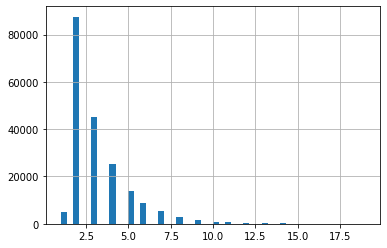

In [11]:
code_info_available.num_codes.hist(bins=50)

## Filter out data without code info


In [14]:
filtered_data = chunk_df.merge(econ_news_kr.metadata, on="id").merge(
    code_info_available.drop_duplicates(subset=["filename"]), on="filename"
)
cols = ["id", "chunk_id", "text", "filename"]
filtered_data = filtered_data[cols]
eKonf.save_data(filtered_data, "econ_news_filtered_20220905.parquet", data_dir)

filtered_data

,id,chunk_id,text,filename
0,11,0,문재인 대통령이 지난해 전용차로 선택한 수소전기차 '넥쏘'가 중·장년층 남성들로부터...,02100101.20201101113442001.txt
1,11,1,넥쏘는 국내 뿐만 아니라 해외에서도 코로나19 확산 여파를 이겨내고 질주하고 있다....,02100101.20201101113442001.txt
2,19,0,LG전자는 국내 최대 쇼핑 행사 ‘2020 코리아세일페스타’에 맞춰 11월 1일부터...,02100101.20201101125903001.txt
3,20,0,SK는 그룹 8개 관계사가 한국 최초로 ‘RE100’에 가입한다고 1일 밝혔다.\n...,02100101.20201101130118001.txt
4,20,1,SK 8개사가 신청서를 제출하면 더 클라이밋 그룹의 검토를 거친 후 가입이 최종 확...,02100101.20201101130118001.txt
...,...,...,...,...
160582,1090535,1,"업종별로 하락한 업종은 운수창고(-1.22%), 운수장비(-1.12%), 전기전자(...",02100851.20220228093428001.txt
160583,1090566,0,[회사채 미매각 현황]\n회사채 시장에 미매각이 속출하고 있다. 현재 연 1.25%...,02100851.20220228103653001.txt
160584,1090566,1,하지만 가뜩이나 악화된 회사채 시장 분위기에 사고 소식까지 전해지면서 아무도 수요예...,02100851.20220228103653001.txt
160585,1090566,2,이에 채권시장에서 자금을 운용하는 각 증권사들의 부담이 커지고 있다. 대부분이 총액...,02100851.20220228103653001.txt


In [13]:
print(filtered_data.info())
filtered_data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160587 entries, 0 to 160586
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        160587 non-null  int64 
 1   chunk_id  160587 non-null  int64 
 2   text      160587 non-null  object
 3   filename  160587 non-null  object
dtypes: int64(2), object(2)
memory usage: 6.1+ MB
None


id           75912
chunk_id        21
text        155838
filename     74614
dtype: int64